
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1xTOIKGpioWcN3yntzSN_Uu_TwaeFvORn/view?usp=sharing)




#Development Environment


In [ ]:

! pip3 install torchtext==0.6.0
! pip3 install transformers


     |████████████████████████████████| 71kB 1.9MB/s 
     |████████████████████████████████| 1.1MB 6.8MB/s 
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1
     |████████████████████████████████| 778kB 2.8MB/s 
     |████████████████████████████████| 890kB 15.9MB/s 
     |████████████████████████████████| 3.0MB 17.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=8b3fb3f14d59bb024a267ee3cb15bbb38899ada690bbc074a19f6bc0a2ddc40c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:

INDEBUG = False

import gc
import matplotlib.pyplot as pyplot
import math
import numpy
import pandas
import platform
import random
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import scipy
import seaborn
import sklearn
import sys
import time
import torch
import torchtext
from packaging import version

out = f'------------- version -------------\n'
out += f'python: {platform.python_version()}\n'
out += f'spacy: {spacy.__version__}\n'
out += f'torch: {torch.__version__}\n'
out += f'torchtext: {torchtext.__version__}\n'
### out += f'transformers: {transformers.__version__}\n'

print(out)

assert(version.parse(torchtext.__version__) >= version.parse('0.6.0'))

pandas.set_option('display.max_colwidth', None)
seaborn.set(context = 'notebook')

batch_size = 64


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


------------- version -------------
python: 3.6.9
spacy: 2.2.4
torch: 1.6.0+cu101
torchtext: 0.6.0



In [ ]:

# https://colab.research.google.com/notebooks/pro.ipynb

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else: print(gpu_info)


Sat Aug 22 18:13:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f'running on {"CUDA" if torch.cuda.is_available() else "NOCUDA"}')


running on CUDA


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# %env JOBLIB_TEMP_FOLDER=/tmp


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

INF, NINF =  math.inf, -math.inf # float('inf'), float('-inf') # sys.float_info.max, sys.float_info.min # numpy.inf, numpy.NINF

def shape(a, msg = 'here'):
    print(f'SHAPE > {msg}:\t{a.shape}')

a = torch.tensor([0, 1, 2])
shape(a, 'before use')

def debug(fun, arg, indebug = INDEBUG):
    if indebug:
        fun(*arg)

debug(shape, (a, 'in debug'), True)

def report_in_training(epoch, total_epoch, done, total):
    print('', end = '\r')
    print(f'epoch\t{epoch}/{total_epoch}:\t{done * 100.0 / total: .2f}% 👈', end = '')

def report_training(epoch, total_epoch, loss_train, loss_validation, accuracy_train, accuracy_validation, medal = False):
    print('', end = '\r')
    print(f'epoch\t{epoch}/{total_epoch}:\ttrain loss = {loss_train: .4f}, validation loss = {loss_validation: .4f}; train accuracy = {accuracy_train * 100: .2f}%, validation accuracy = {accuracy_validation * 100: .2f}%{" 🥇" if medal else ""}')

for epoch in range (3):
    for i in range(6):
        report_in_training(epoch + 1, 3, i + 1, 9)
        time.sleep(1)
    report_training(epoch + 1, 3, 1.1, 1.2, 0.936, 0.89898, epoch == 1)

def report_in_test(done, total):
    print('', end = '\r')
    print(f'test:\t{done * 100.0 / total: .2f}% 👈', end = '')

def report_test(loss, accuracy, medal = False):
    print('', end = '\r')
    print(f'test:\tloss = {loss: .4f}, accuracy = {accuracy * 100: .2f}%{" 🥇" if medal else ""}')

for i in range(6):
    report_in_test(i + 1, 9)
    time.sleep(1)
report_test(1.936, 0.89898, True)


SHAPE > before use:	torch.Size([3])
SHAPE > in debug:	torch.Size([3])
epoch	1/3:	train loss =  1.1000, validation loss =  1.2000; train accuracy =  93.60%, validation accuracy =  89.90%
epoch	2/3:	train loss =  1.1000, validation loss =  1.2000; train accuracy =  93.60%, validation accuracy =  89.90% 🥇
epoch	3/3:	train loss =  1.1000, validation loss =  1.2000; train accuracy =  93.60%, validation accuracy =  89.90%
test:	loss =  1.9360, accuracy =  89.90% 🥇



#Pre-processing Data


In [ ]:

home_huffpost = '/content/drive/My Drive/Colab Notebooks/kaggle/'

data_pandas = pandas.read_json(home_huffpost + 'News_Category_Dataset_v2.json', dtype = {'category': 'category'}, lines = True) #('../input/news-category-dataset/News_Category_Dataset_v2.json', lines = True)
data_pandas = data_pandas.sample(frac = 1.0)

print(f'data shape:\t{data_pandas.shape}')
data_pandas.head(9)


data shape:	(200853, 6)


category  ...       date
186140         TRAVEL  ... 2012-07-04
10642   LATINO VOICES  ... 2017-11-30
127865       WELLNESS  ... 2014-03-17
37481           WOMEN  ... 2017-01-12
29783   THE WORLDPOST  ... 2017-04-08
87208           FIFTY  ... 2015-06-27
43906        POLITICS  ... 2016-10-30
40720   THE WORLDPOST  ... 2016-12-05
142546   QUEER VOICES  ... 2013-10-12

[9 rows x 6 columns]

In [ ]:

# merge 'THE WORLDPOST' and 'WORLDPOST', which are the same category:
data_pandas.loc[data_pandas['category'] == 'THE WORLDPOST', ['category']] = 'WORLDPOST'
assert(data_pandas[data_pandas['category'] == 'THE WORLDPOST'].shape[0] == 0)

# data_pandas[data_pandas['category'] == 'POLITICS'].shape[0]
# data_pandas = data_pandas.drop(data_pandas[data_pandas['category'] == 'POLITICS'].index)
# data_pandas[data_pandas['category'] == 'POLITICS'].shape[0]


In [ ]:

category = list(data_pandas.category.factorize()[1])
print(f'there are {len(category)} categories:\n', '\n'.join(category))

# todo map text label to num label


there are 40 categories:
 TRAVEL
LATINO VOICES
WELLNESS
WOMEN
WORLDPOST
FIFTY
POLITICS
QUEER VOICES
COMEDY
ENTERTAINMENT
HEALTHY LIVING
STYLE
PARENTS
HOME & LIVING
WEDDINGS
PARENTING
FOOD & DRINK
STYLE & BEAUTY
BUSINESS
ARTS
SPORTS
SCIENCE
GREEN
MONEY
BLACK VOICES
RELIGION
TECH
WEIRD NEWS
CRIME
WORLD NEWS
DIVORCE
ENVIRONMENT
IMPACT
TASTE
MEDIA
GOOD NEWS
ARTS & CULTURE
CULTURE & ARTS
COLLEGE
EDUCATION



(only run above for transformer)


In [ ]:

data_pandas.category.astype('category')

# data_pandas[data_pandas.category.isnull()]

data_pandas['label'] = data_pandas.category.factorize()[0]
data_pandas['label'].astype('category')
data_pandas['text'] = 'By ' + data_pandas.authors + ' : ' + data_pandas.headline + ' : ' + data_pandas.short_description + ' ~ ' + data_pandas.authors # important thing repeats

huffpost_headline_csv = home_huffpost + 'huffpost_headline.csv'

data_pandas[['text', 'label']].to_csv(huffpost_headline_csv, index = False)

data_pandas.head(9)


category  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text
98654             ARTS  ...                                                                                                                                        By Daniel Maidman, Contributorartist and novelist : Demiurge : I have now and then heard artists likened to the demiurge - Plato's word for the divinity that made the cosmos. This never made a visceral impression on me until I saw how Assael paints. He summons an image the way the Genesis demiurge summons the universe. ~ Daniel Maidman, Contributorartist and novelist
145890          SPORTS  ...                                                                                                                                                                                                                                                                                                         By  : Craig James Fired By FOX Sports Southwest Over Anti-Gay Comments: REPORT : “We just asked ourselves how Craig’s statements would play in our human resources department,” an unnamed Fox spokesman told ~ 
93622            MEDIA  ...                                                                                                                                                                                                                                                                                                                                                                                                                     By Catherine Taibi : These Schools Are Rethinking How They Train Their Teachers :  ~ Catherine Taibi
196392        WELLNESS  ...                                                                                                                                                                                                                                                                                                                      By Laura Schocker : 7 Health Lessons From The Irish : Tomorrow is St. Patrick's Day, a holiday that's earned itself an unhealthy rap by encouraging binge drinking and over-eating ~ Laura Schocker
171286  STYLE & BEAUTY  ...                                 By Arlene Goldstein, Contributor\nVice President of Trend Merchandising and Fashion Direction, B... : Why I Struggle With Wearing Red : Red is everywhere. It is nearly impossible to avoid, especially during the holidays. I dare say that even the little black dress is red this time of year. So call me crazy when I say that I'm just not in the zone -- the red zone that is. ~ Arlene Goldstein, Contributor\nVice President of Trend Merchandising and Fashion Direction, B...
78692    ENTERTAINMENT  ...                                                                                                                                                                                                                                                                                                                                                                                    By Lauren Zupkus : Seth Rogen Looked So Swaggy At His Bar Mitzvah Back In The Day : All dressed up and ready to rage. ~ Lauren Zupkus
139181    BLACK VOICES  ...  By Avis Jones-DeWeever, Contributor\nDiversity, Equity & Inclusion Solutionist. Author.  Internatio... : Renisha, Jonathon, Trayvon...The New Strange Fruit? : As a young adult, I was Renisha McBride.  Traveling home from college late one evening, my car 

In [ ]:

data_pandas_csv = pandas.read_csv(huffpost_headline_csv, dtype={'category': 'category', 'label' : 'category'})

print(f'data shape:\t{data_pandas_csv.shape}')
data_pandas_csv.head(9)


data shape:	(200853, 2)


text label
0                                                                                                                                        By Daniel Maidman, Contributorartist and novelist : Demiurge : I have now and then heard artists likened to the demiurge - Plato's word for the divinity that made the cosmos. This never made a visceral impression on me until I saw how Assael paints. He summons an image the way the Genesis demiurge summons the universe. ~ Daniel Maidman, Contributorartist and novelist     0
1                                                                                                                                                                                                                                                                                                         By  : Craig James Fired By FOX Sports Southwest Over Anti-Gay Comments: REPORT : “We just asked ourselves how Craig’s statements would play in our human resources department,” an unnamed Fox spokesman told ~      1
2                                                                                                                                                                                                                                                                                                                                                                                                                     By Catherine Taibi : These Schools Are Rethinking How They Train Their Teachers :  ~ Catherine Taibi     2
3                                                                                                                                                                                                                                                                                                                      By Laura Schocker : 7 Health Lessons From The Irish : Tomorrow is St. Patrick's Day, a holiday that's earned itself an unhealthy rap by encouraging binge drinking and over-eating ~ Laura Schocker     3
4                                 By Arlene Goldstein, Contributor\nVice President of Trend Merchandising and Fashion Direction, B... : Why I Struggle With Wearing Red : Red is everywhere. It is nearly impossible to avoid, especially during the holidays. I dare say that even the little black dress is red this time of year. So call me crazy when I say that I'm just not in the zone -- the red zone that is. ~ Arlene Goldstein, Contributor\nVice President of Trend Merchandising and Fashion Direction, B...     4
5                                                                                                                                                                                                                                                                                                                                                                                    By Lauren Zupkus : Seth Rogen Looked So Swaggy At His Bar Mitzvah Back In The Day : All dressed up and ready to rage. ~ Lauren Zupkus     5
6  By Avis Jones-DeWeever, Contributor\nDiversity, Equity & Inclusion Solutionist. Author.  Internatio... : Renisha, Jonathon, Trayvon...The New Strange Fruit? : As a young adult, I was Renisha McBride.  Traveling home from college late one evening, my car stalled.  With no cell phone, and still miles away from home, I made Renisha's choice.  I walked to the nearest home and knocked on the front door. ~ Avis Jones-DeWeever, Contributor\nDiversity, Equity & Inclusion Solutionist. Author.  Internatio...     6
7                                                              By Tara Brach, Contributor\nClinical psychologist, meditation teacher and author : Imperfection Is Not a Problem : We all get caught in wants and fears, we all act unconsciously, we all get diseased and deteriorate. If we can learn to relax about imperfection, we no longer lose our life moments in the pursuit of being different and i

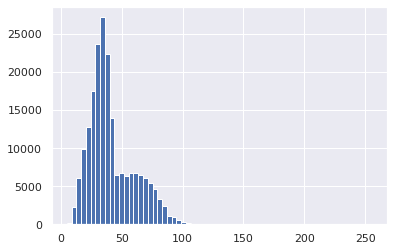

In [ ]:

seq_lens = [len(s.split()) for s in data_pandas_csv['text']]
pandas.Series(seq_lens).hist(bins = 64)



# Loading with *torchtext*


In [ ]:

%%time

'''
see: https://pytorch.org/text/data.html
'''

seq_len = 96 # 256

class Data():

    def __init__(self, path, embedding = 'glove.6B.100d', batch_size = 64, seq_len = 128, tokenizer = 'spacy', lang = 'en'):
        self.path = path
        self.iter_train = self.iter_val = self.iter_test = None
        self.seq_len = seq_len
        self.tokenizer = tokenizer
        self.lang = lang
        self.batch_size = batch_size
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.label = {}
        self.embedding = embedding #'fasttext.en.300d' # 'glove.6B.100d' 'glove.twitter.27B.100d'
        self.dim_embedding = -1
        self.vocab = None
        self.size_train = self.size_val = self.size_test = -1

    def load(self):
        field_text = torchtext.data.Field(sequential = True, fix_length = self.seq_len, lower = True, tokenize = self.tokenizer, tokenizer_language = self.lang, batch_first = True, pad_first = True, stop_words = STOP_WORDS) # torchtext.data.Field(sequential = True, fix_length = 128, lower = True, tokenize = 'spacy'self.tokenizer, tokenizer_language = 'en', batch_first = True)
        field_label = torchtext.data.Field(sequential = False, use_vocab = False, batch_first = True, unk_token = None, is_target = True)
        dataset = torchtext.data.TabularDataset(path = self.path, format = 'CSV', fields = {'text': ('text', field_text),
                                                                                            'label': ('label', field_label)})
        dataset_train, dataset_val, dataset_test = dataset.split(split_ratio = [0.76, 0.13, 0.11]) #[0.6, 0.2, 0.2])
        field_text.build_vocab(dataset_train, vectors = self.embedding)
        field_text.vocab.vectors.unk_init = torch.nn.init.xavier_uniform
        self.vocab = field_text.vocab
        # field_label.build_vocab(dataset_train, vectors = self.embedding)
        # field_label.vocab.vectors.unk_init = torch.nn.init.xavier_uniform
        # self.label = field_label.vocab.stoi
        self.dim_embedding = len(field_text.vocab)
        self.iter_train = torchtext.data.BucketIterator(dataset_train, batch_size = self.batch_size, train = True, repeat = False, shuffle = True, sort = False, device = self.device) # repeat with True will make a never-end iter
        self.iter_val = torchtext.data.Iterator(dataset_val, batch_size = self.batch_size, train = False, repeat = False, shuffle = True, sort = False, device = self.device)
        self.iter_test = torchtext.data.Iterator(dataset_test, batch_size = self.batch_size, train = False, repeat = False, shuffle = True, sort = False, device = self.device)
        debug(print, (f'DATASET TRAIN:\t{dataset_train[3].text}\t→\t{dataset_train[3].label}\nLABEL:\t{self.label}'), indebug = True)
        self.size_train, self.size_val, self.size_test = self.batch_size * len(self.iter_train), self.batch_size * len(self.iter_val), self.batch_size * len(self.iter_test)

    def get_iter_train(self):
        r = None
        if self.iter_train: self.iter_train.init_epoch()
        else: self.load()
        r = self.iter_train
        return r

    def get_iter_val(self):
        r = None
        if self.iter_val: self.iter_val.init_epoch()
        else: self.load()
        r = self.iter_val
        return r

    def get_iter_test(self):
        r = None
        if self.iter_test: self.iter_test.init_epoch()
        else: self.load()
        r = self.iter_test
        return r

    def get_size_train(self):
        if self.size_train < 0: self.load()
        return self.size_train

    def get_size_val(self):
        if self.size_val < 0: self.load()
        return self.size_val

    def get_size_test(self):
        if self.size_test < 0: self.load()
        return self.size_test

def spacy_tokenizer():
    _spacy = spacy.load('en')
    return lambda text: [token.text for token in _spacy.tokenizer(text)]

path_data = huffpost_headline_csv

data = Data(path_data, 'glove.twitter.27B.50d', seq_len = seq_len, batch_size = batch_size) # 'glove.6B.50d' # 'glove.twitter.27B.25d' # 'glove.twitter.27B.100d' # https://pytorch.org/text/vocab.html#torchtext.vocab.Vocab.load_vectors


CPU times: user 139 µs, sys: 0 ns, total: 139 µs
Wall time: 144 µs


In [ ]:

%%time

data.load()


.vector_cache/glove.twitter.27B.zip: 1.52GB [11:42, 2.16MB/s]                            
100%|█████████▉| 1192929/1193514 [00:45<00:00, 24666.68it/s]

D A T A S E T   T R A I N : 	 [ '   ' ,   ' : ' ,   ' o b s t r u c t i v e ' ,   ' s l e e p ' ,   ' a p n e a ' ,   ' s e v e r i t y ' ,   ' l i n k e d ' ,   ' d e a t h ' ,   ' r i s k ' ,   ' : ' ,   ' j o u r n a l ' ,   ' c l i n i c a l ' ,   ' s l e e p ' ,   ' m e d i c i n e ' ,   ' s t u d y ' ,   ' f i n d ' ,   ' s l e e p ' ,   ' a p n e a ' ,   ' s e v e r i t y ' ,   ' l i n k e d ' ,   ' d e a t h ' ,   ' r i s k ' ,   ' ~ ' ] 	 → 	 3 
 L A B E L : 	 { }
CPU times: user 3min 12s, sys: 15.6 s, total: 3min 27s
Wall time: 14min 55s


In [ ]:

print(f'---------------------- size ----------------------\ntrain\tvalidation\ttest\n \
    {batch_size: 3d} x {len(data.get_iter_train()): 6d} = {data.get_size_train(): 9d}\t \
    {batch_size: 3d} x {len(data.get_iter_val()): 6d} = {data.get_size_val(): 9d}\t \
    {batch_size: 3d} x {len(data.get_iter_test()): 6d} = {data.get_size_test(): 9d}\n')


---------------------- size ----------------------
train	validation	test
      64 x   2386 =    152704	      64 x    346 =     22144	      64 x    408 =     26112




#RNN



##Model

关于LSTM的输出，这里是多对一分类（RNN分类类型见下图），根据`torch.nn.LSTM`的说明，其输出为$ ( \text{seq_len}, \text{batch}, \text{num_directions} \times \text{hidden_size} ) $形状的张量（这里采用batch_first：**If True, then the input and output tensors are provided as (batch, seq, feature).**），这里的$ \text{seq_len} $对应下图中的$ x^{ \langle T_x \rangle } $里的$ \langle T_x \rangle $。



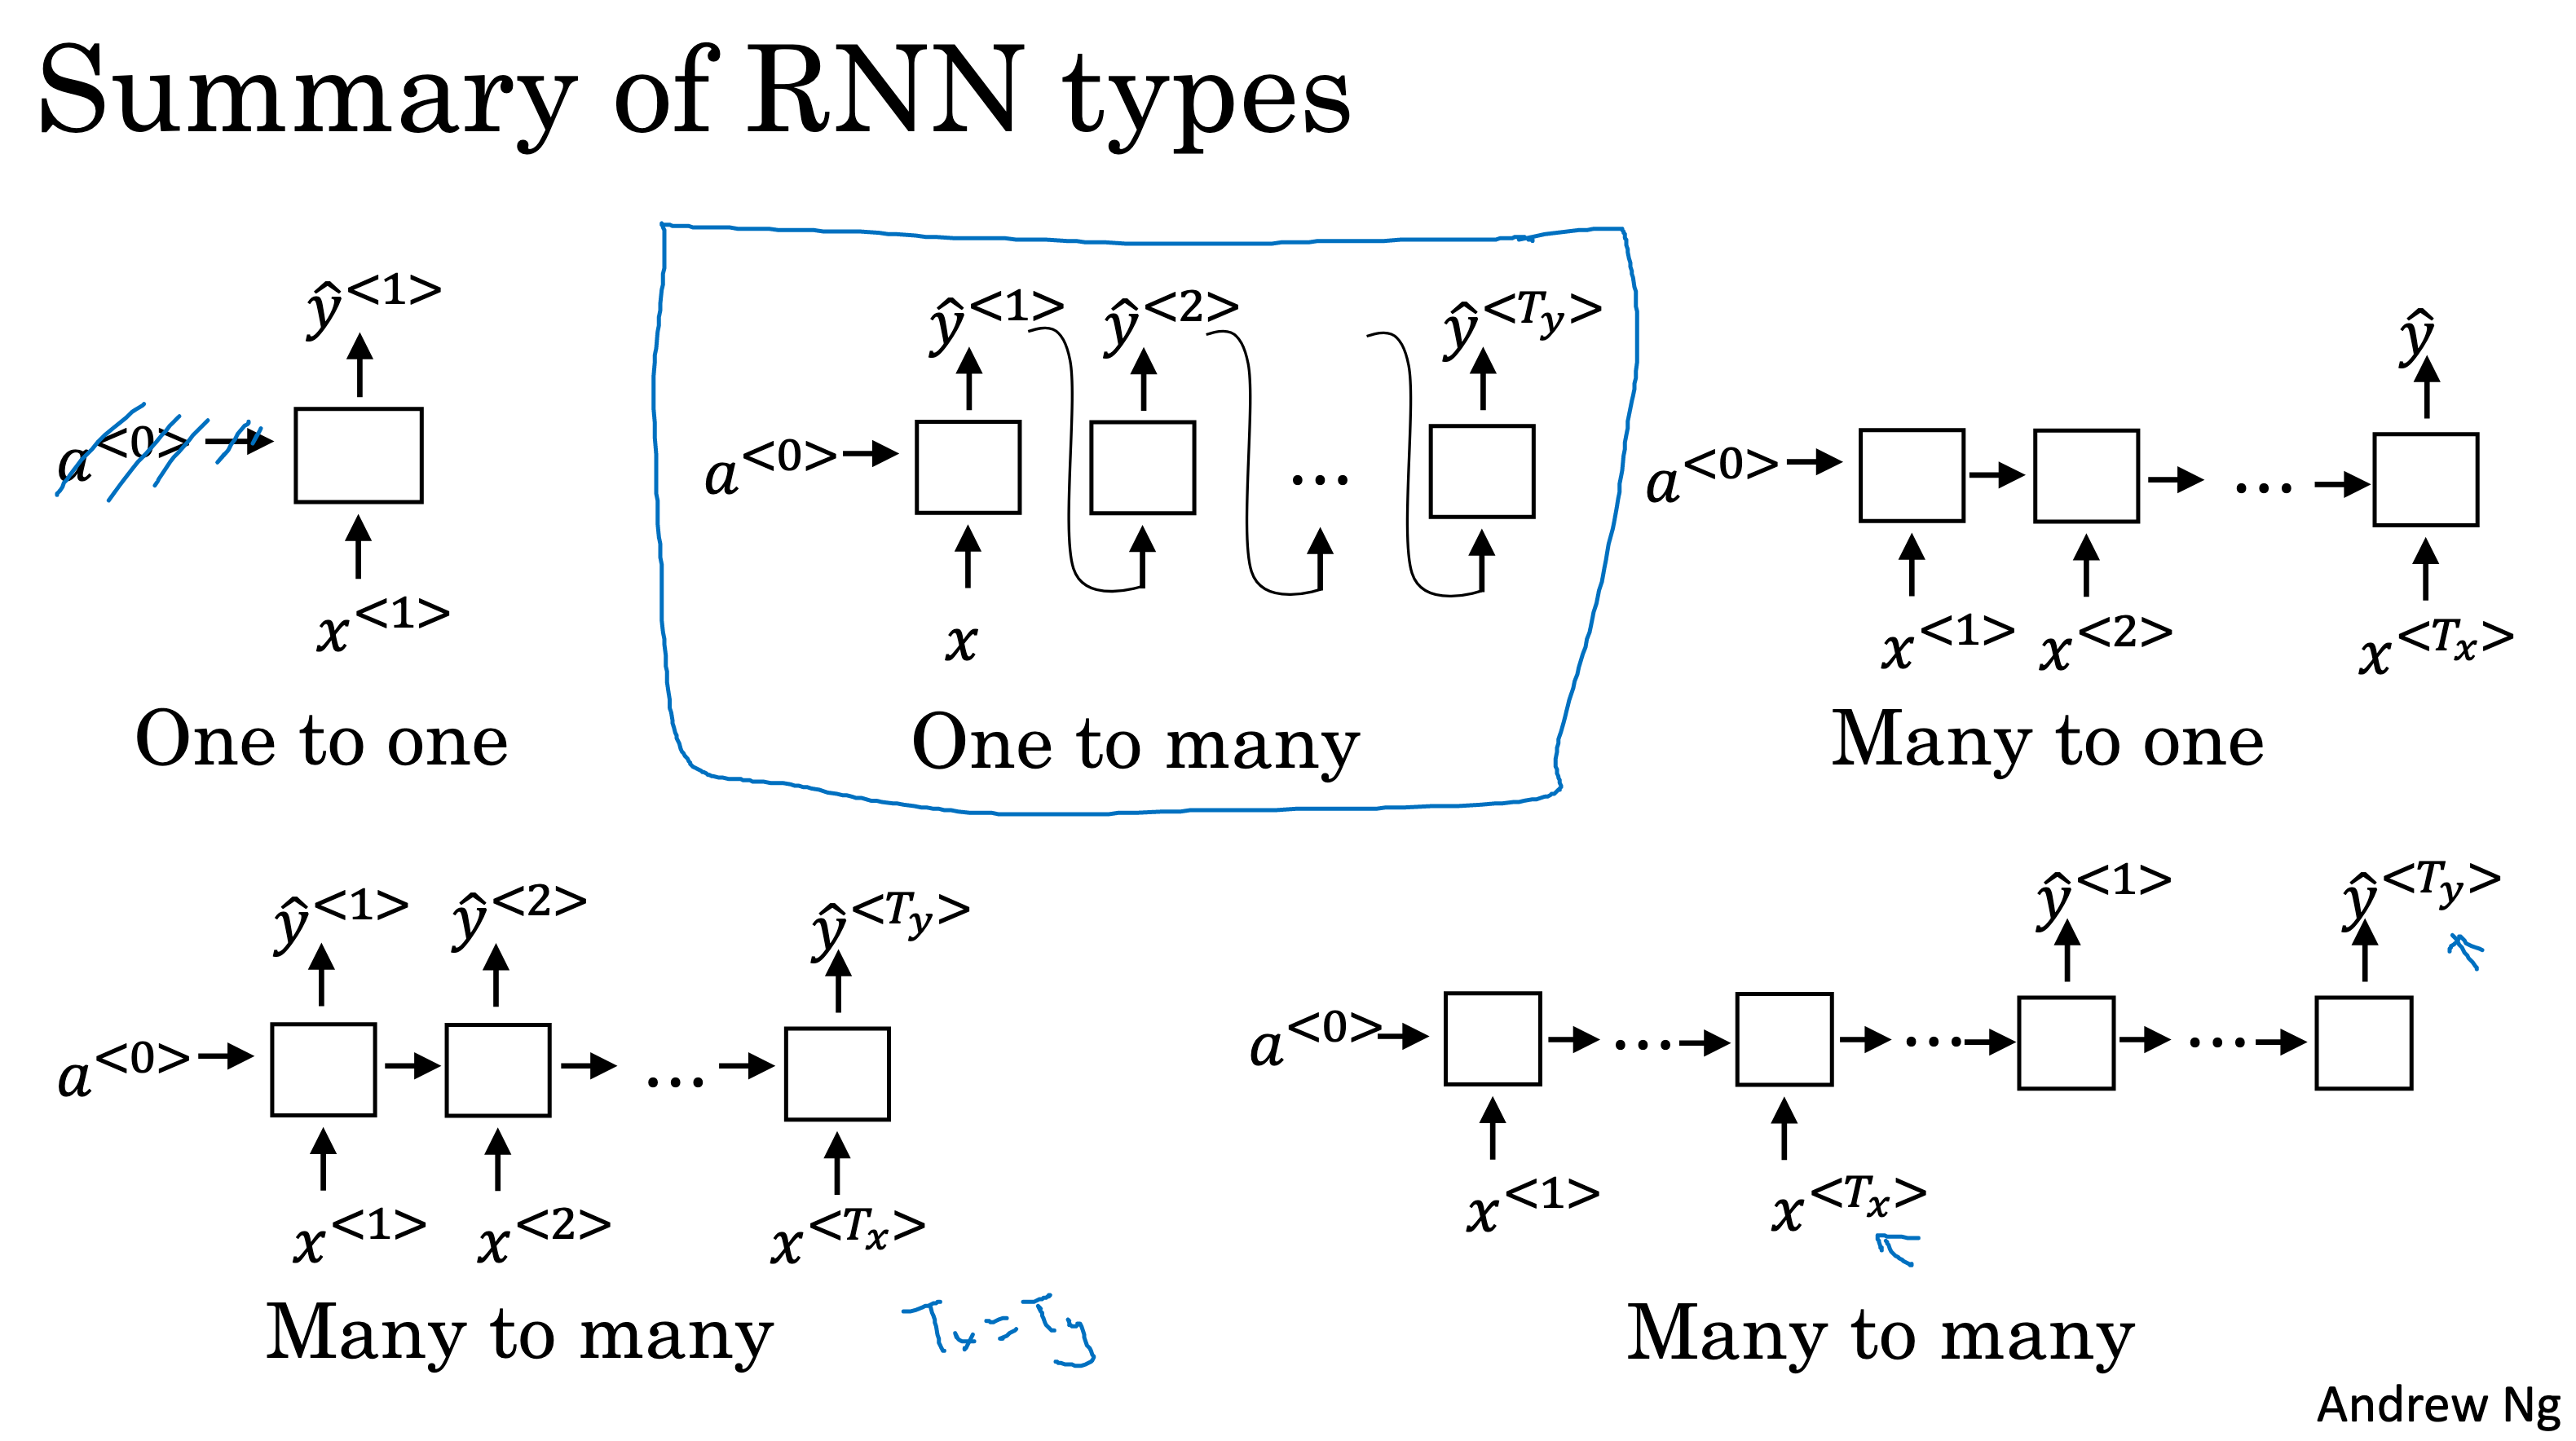


In [ ]:

class Cla(torch.nn.Module):

    def __init__(self, vocab: torchtext.vocab, output_size, hidden_dim, n_layers, bidirectional = False, drop_prob = 0.382):
        super().__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.vocab = vocab
        # define all layers
        debug(shape, (self.vocab.vectors, 'in Cla constructor'))
        self.embedding = torch.nn.Embedding(*self.vocab.vectors.shape)
        self.embedding.weight.data.copy_(vocab.vectors) # load pre-trained embedding vector
        self.lstm = torch.nn.LSTM(self.vocab.vectors.shape[1], hidden_dim, n_layers, batch_first = True, dropout = drop_prob, bidirectional = bidirectional)
        self.direction = 2 if bidirectional else 1
        self.dropout = torch.nn.Dropout(p = drop_prob)
        self.fc = torch.nn.Linear(hidden_dim * self.direction, output_size)
        self.out = torch.nn.LogSoftmax(dim = -1) # may use 2: 2 means Softmax will compute along the 2nd dim of the input; after fc x.shape: torch.Size([64, 300, 42])

    def forward(self, x, hidden):
        debug(shape, (x, 'x as forward input'))
        debug(shape, (hidden[0], 'h0 as forward input'))
        debug(shape, (hidden[1], 'h1 as forward input'))
        batch_size = x.shape[0] # todo abstract batch_size
        x = self.embedding(x)
        debug(shape, (x, 'x after embedding'))
        x, hidden = self.lstm(x, hidden)
        # stack up lstm outputs
        debug(shape, (x, 'x after lstm'))
        x = x.contiguous()
        debug(shape, (x, 'x after contiguous'))
        x = x.view(-1, self.hidden_dim * self.direction) # todo check: self.hidden_dim * 2 for bidirection?
        debug(shape, (x, 'x after resize'))
        x = self.dropout(x)
        debug(shape, (x, 'x after dropout'))
        x = self.fc(x)
        debug(shape, (x, 'x after fc'))
        q = self.out(x)
        debug(shape, (q, 'q'))
        debug(print, (f'q[0]:\n{q[0]}'))
        q = q.view(batch_size, -1, self.output_size)[ : , -1, : ]
        return q, hidden

    def init_hidden(self, batch_size):
        h = torch.rand((self.n_layers * self.direction, batch_size, self.hidden_dim), dtype = torch.float, device = device, requires_grad = True)
        c = torch.rand((self.n_layers * self.direction, batch_size, self.hidden_dim), dtype = torch.float, device = device, requires_grad = True)
        hidden = (h, c)
        return hidden



##On glove.6B.50d (8192 examples)

| test accuracy | epochs | hidden-dim | layers | dropout |
|:-------------:|:------:|:----------:|:------:|:-------:|
| 65.81%        | 64     | 32         | 1      | 0.382   |
| 72.61%        | 64     | 128        | 2      | 0.382   |
| 68.23%        | 64     | 128        | 4      | 0.382   |
| 70.67%        | 64     | 128        | 3      | 0.382   |
| 69.33%        | 64     | 128        | 3      | 0.5     |
| 73.78%        | 64     | 128        | 2      | 0.1     |
| 75.15%        | 96     | 128        | 2      | 0.1     |


In [ ]:

output_size = len(category) # len(data.label)
hidden_dim = 128 #64 #128 #256 #512
n_layers = 2

cla = Cla(data.vocab, output_size, hidden_dim, n_layers, bidirectional = True, drop_prob = 0.1)

print(cla)


Cla(
  (embedding): Embedding(96531, 50)
  (lstm): LSTM(50, 128, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=256, out_features=40, bias=True)
  (out): LogSoftmax(dim=-1)
)


In [ ]:

# loss and optimization functions
lr = 0.001

criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(cla.parameters(), lr = lr)


epoch	1/8:	 0.00% 👈

100%|█████████▉| 1192929/1193514 [01:00<00:00, 24666.68it/s]

epoch	1/8:	train loss =  1.4559, validation loss =  0.9708; train accuracy =  59.94%, validation accuracy =  72.29% 🥇
epoch	2/8:	train loss =  0.8037, validation loss =  0.7873; train accuracy =  73.98%, validation accuracy =  77.21% 🥇
epoch	3/8:	train loss =  0.6023, validation loss =  0.7421; train accuracy =  80.00%, validation accuracy =  78.09% 🥇
epoch	4/8:	train loss =  0.4569, validation loss =  0.7449; train accuracy =  85.23%, validation accuracy =  78.84%
epoch	5/8:	train loss =  0.3372, validation loss =  0.8153; train accuracy =  87.32%, validation accuracy =  78.03%
epoch	6/8:	train loss =  0.2416, validation loss =  0.9085; train accuracy =  90.08%, validation accuracy =  77.71%
epoch	7/8:	train loss =  0.1734, validation loss =  1.0047; train accuracy =  91.69%, validation accuracy =  77.11%
epoch	8/8:	train loss =  0.1220, validation loss =  1.0986; train accuracy =  95.79%, validation accuracy =  76.91%


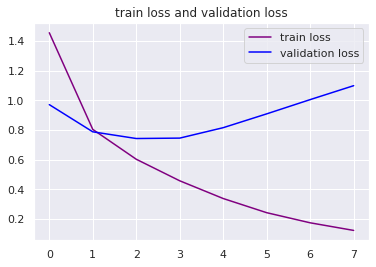

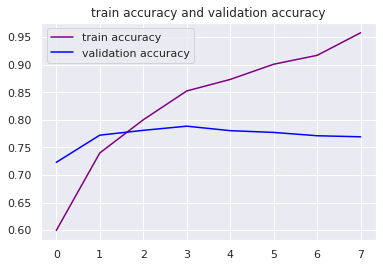

CPU times: user 10min 52s, sys: 1min 5s, total: 11min 57s
Wall time: 11min 56s


In [ ]:

############## train ##############

%%time

# training params

epochs = 8
runno = 128 #128 #639 #369 # float('inf')
clip = 6 # gradient clipping

# move model to GPU, if available
cla.to(device)

cla.train()
model, lowest_val_loss = home_huffpost + 'huffpost_headline.torm', float('inf')
# train for some number of epochs
loss_train, loss_val = [], []
accuracy_train, accuracy_val = [], []
for e in range(epochs):
    # initialize hidden state
    # h = cla.init_hidden(batch_size) # todo remove me
    # batch loop
    done, total = 0, data.get_size_train() + data.get_size_val() # batch_size * runno + data.get_size_val()
    num_correct_train, num_correct_val = 0.0, 0.0
    report_in_training(e + 1, epochs, done, total)
    c, loss_batch = 0, 0.0
    for X, y in data.get_iter_train():
        if X.shape[0] < data.batch_size: break
        c += 1
        # if c > runno: break
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = cla.init_hidden(X.shape[0]) # (h[0].detach(), h[1].detach()) # tuple([each.data for each in h])
        # zero accumulated gradients
        cla.zero_grad()
        # get the output from the model
        q, h = cla(X, h)
        yhat = q.argmax(dim = -1)
        correct_tensor = yhat.eq(y)
        num_correct_train += correct_tensor.sum()
        # calculate the loss and perform backprop
        debug(shape, (q, 'cla.forward output'))
        debug(shape, (y, 'label'))
        loss = criterion(q, y)
        loss_batch += loss.item()
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(cla.parameters(), clip)
        optimizer.step()
        done += batch_size
        report_in_training(e + 1, epochs, done, total)
    # loss stats
    loss_train.append(loss_batch / c)
    accuracy_train.append(num_correct_train / (data.get_size_train() - data.get_size_train() % data.batch_size)) # (batch_size * runno))
    # Get validation loss
    c, loss_batch = 0, 0.0
    cla.eval()
    # eval() and no_grad(): https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615/2
    with torch.no_grad(): 
        for X, y in data.get_iter_val():
            if X.shape[0] < data.batch_size: break
            c += 1
            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            val_h = cla.init_hidden(X.shape[0]) # tuple([each.data for each in val_h])
            q, val_h = cla(X, val_h)
            yhat = q.argmax(dim = -1)
            correct_tensor = yhat.eq(y)
            num_correct_val += correct_tensor.sum()
            loss = criterion(q, y)
            loss_batch += loss.item()
            done += batch_size
            report_in_training(e + 1, epochs, done, total)
        loss_val.append(loss_batch / c)
        accuracy_val.append(num_correct_val / (data.get_size_val() - data.get_size_val() % data.batch_size))
        cla.train()
        bet = False
        if lowest_val_loss > loss_val[-1]:
            torch.save(cla.state_dict(), model)
            lowest_val_loss = loss_val[-1]
            bet = True
        report_training(e + 1, epochs, loss_train[-1], loss_val[-1], accuracy_train[-1], accuracy_val[-1], bet)

pyplot.figure()
pyplot.title('train loss and validation loss')
pyplot.plot(range(epochs), loss_train, 'purple', label = 'train loss')
pyplot.plot(range(epochs), loss_val, 'blue', label = 'validation loss')
pyplot.legend()

pyplot.show()

pyplot.figure()
pyplot.title('train accuracy and validation accuracy')
pyplot.plot(range(epochs), accuracy_train, 'purple', label = 'train accuracy')
pyplot.plot(range(epochs), accuracy_val, 'blue', label = 'validation accuracy')
pyplot.legend()

pyplot.show()


In [ ]:

############## test ##############

%%time

def test():
    loss_test = [] # track loss
    num_correct = 0.0

    cla = Cla(data.vocab, output_size, hidden_dim, n_layers, bidirectional = True, drop_prob = 0.1)
    cla.load_state_dict(torch.load(model))
    cla.to(device)

    cla.eval()
    # eval() and no_grad(): https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615/2
    with torch.no_grad(): 
        for X, y in data.get_iter_test():
            if X.shape[0] < data.batch_size: break
            # if c > runno: break
            # create new variables for the hidden state, otherwise pytorch would backprop through the entire training history
            h = cla.init_hidden(X.shape[0]) # tuple([each.data for each in h])
            # get predicted outputs
            q, h = cla(X, h)
            # compare predictions to true label
            yhat = q.argmax(dim = -1) # there is <oov> category with the index 0 # yhat = q.argsort(dim = -1)[ : , -2]
            correct_tensor = yhat.eq(y)
            num_correct += correct_tensor.sum()
            # calculate loss
            test_loss = criterion(q, y)
            loss_test.append(test_loss.item())

    ######### -- stats! -- #########
    # accuracy over all test data
    accuracy_test = num_correct / (data.get_size_test() - data.get_size_test() % data.batch_size)
    report_test(numpy.mean(loss_test), accuracy_test, accuracy_test > 0.8)

test()


test:	loss =  0.7482, accuracy =  77.96%
CPU times: user 5.05 s, sys: 77.3 ms, total: 5.12 s
Wall time: 5.13 s




---




#Attention

This section, general attention mechanism is introduced. The method used here comes from: [Attention-Based Bidirectional Long Short-Term Memory Networks forRelation Classification](https://www.aclweb.org/anthology/P16-2034.pdf).



##Model


In [ ]:

class Attention(torch.nn.Module):
    '''
    https://pytorch.org/docs/stable/notes/extending.html#extending-torch-nn
    https://www.aclweb.org/anthology/P16-2034.pdf
    '''

    def __init__(self, dim, bidirectional = True):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.rand(dim))
        self.direction = 2 if bidirectional else 1 

    def forward(self, input):
        # LSTM doc: For the unpacked case, the directions can be separated using output.view(seq_len, batch, num_directions, hidden_size), with forward and backward being direction 0 and 1 respectively.
        H_forward = H_backward = None
        if self.direction > 1: H_forward, H_backward = input.select(2, 0), input.select(2, 1)
        else:
            H_forward = input
            H_backward = torch.zeros_like(H_forward)
        debug(shape, (H_forward, 'H_forward'))
        debug(shape, (H_backward, 'H_backward'))
        H = H_forward + H_backward # H is dw x T matrix. dw is the dimension of the word vectors.
        debug(shape, (H, 'H'))
        M = torch.tanh(H)
        debug(shape, (M, 'M'))
        debug(shape, (self.weight, 'w'))
        T = torch.matmul(M.transpose(1, 2), self.weight)
        debug(shape, (T, 'T'))
        alpha = torch.softmax(T, dim = -1) # w is dw-dimension trainable weight vector.
        debug(shape, (alpha, 'alpha'))
        r = torch.matmul(H, alpha.unsqueeze(-1))
        return r.squeeze(-1) # torch.tanh(r.squeeze(-1))

class Cla(torch.nn.Module):

    def __init__(self, vocab: torchtext.vocab, output_size, hidden_dim, n_layers, bidirectional = False, drop_prob = 0.382):
        super().__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.vocab = vocab
        self.direction = 2 if bidirectional else 1
        # define all layers
        debug(shape, (self.vocab.vectors, 'in Cla constructor'))
        self.embedding = torch.nn.Embedding(*self.vocab.vectors.shape)
        self.embedding.weight.data.copy_(vocab.vectors) # load pre-trained embedding vector
        self.lstm0 = torch.nn.LSTM(self.vocab.vectors.shape[1], hidden_dim, n_layers, batch_first = True, dropout = drop_prob, bidirectional = bidirectional)
        self.dropout0 = torch.nn.Dropout(p = drop_prob)
        self.attention = Attention(data.seq_len)
        self.lstm1 = torch.nn.LSTM(self.vocab.vectors.shape[1], hidden_dim, n_layers, batch_first = True, dropout = drop_prob, bidirectional = bidirectional)
        self.dropout1 = torch.nn.Dropout(p = drop_prob)
        self.fc = torch.nn.Linear(hidden_dim * self.direction, output_size) # self.fc = torch.nn.Linear(data.batch_size * data.seq_len, data.batch_size * output_size)
        self.out = torch.nn.LogSoftmax(dim = -1) # may use 2: 2 means Softmax will compute along the 2nd dim of the input; after fc x.shape: torch.Size([64, 300, 42])

    def forward(self, x, hidden):
        debug(shape, (x, 'x as forward input'))
        debug(shape, (hidden[0], 'h0 as forward input'))
        debug(shape, (hidden[1], 'h1 as forward input'))
        batch_size = x.shape[0] # todo abstract batch_size
        x = self.embedding(x)

        for i in range(1):
            xx = x.clone()
            debug(shape, (x, 'x before lstm0{i}'))
            x, hidden = self.lstm0(x, hidden)
            # stack up lstm outputs
            debug(shape, (x, 'x after lstm0{i}'))
            x = x.contiguous()
            debug(shape, (x, 'x after contiguous'))
            x = x.view(-1, self.hidden_dim * self.direction) # todo check: self.hidden_dim * 2 for bidirection?
            debug(shape, (x, 'x after resize'))
            x = self.dropout0(x)
            debug(shape, (x, 'x after dropout0{i}'))
            x = x.view(batch_size, data.seq_len, self.direction, -1)
            x = self.attention(x)
            debug(shape, (x, 'after attention{i}'))
            x = (xx.transpose(0, 2) * x.transpose(0, 1)).transpose(0, 2)

        debug(shape, (x, 'x before lstm1'))
        x, hidden = self.lstm1(x, hidden)
        # stack up lstm outputs
        debug(shape, (x, 'x after lstm1'))
        x = x.contiguous()
        debug(shape, (x, 'x after contiguous'))
        x = x.view(-1, self.hidden_dim * self.direction) # todo check: self.hidden_dim * 2 for bidirection?
        debug(shape, (x, 'x after resize'))
        x = self.dropout1(x)
        debug(shape, (x, 'x after dropout1'))

        x = self.fc(x)
        debug(shape, (x, 'x after fc'))
        q = self.out(x)
        debug(shape, (q, 'q'))
        debug(print, (f'q[0]:\n{q[0]}'))
        q = q.view(batch_size, -1, self.output_size)[ : , -1, : ]

        # x = x.view(-1)
        # x = self.fc(x)
        # debug(shape, (x, 'x after fc'))
        # x = x.view(data.batch_size, -1)
        # debug(shape, (x, 'x before out'))
        # q = self.out(x)
        # debug(shape, (q, 'q'))
        # debug(print, (f'q[0]:\n{q[0]}'))
        # q = q.view(batch_size, -1, self.output_size)[ : , -1, : ]
        
        return q, hidden

    def init_hidden(self, batch_size):
        h = torch.rand((self.n_layers * self.direction, batch_size, self.hidden_dim), dtype = torch.float, device = device, requires_grad = True)
        c = torch.rand((self.n_layers * self.direction, batch_size, self.hidden_dim), dtype = torch.float, device = device, requires_grad = True)
        hidden = (h, c)
        return hidden



##On glove.6B.50d (8192 examples)

| test accuracy | epochs | hidden-dim | layers | dropout |
|:-------------:|:------:|:----------:|:------:|:-------:|
| 74.33%        | 64     |     32     |    1   |  0.382  |
| 76.50%       | 64     | 128        | 2      | 0.382   |
| 74.83%        | 64     | 128        | 4      | 0.382   |
| 75.62%        | 64     | 128        | 3      | 0.382   |
| 75.72%        | 64     | 128        | 3      | 0.5     |
| 76.30%        | 64     | 128        | 2      | 0.1     |
| 76.01%        | 96     | 128        | 2      | 0.1     |
| 76.63%        | 64     | 64        | 2      | 0.1     |



In [ ]:

output_size = len(category) # len(data.label)
hidden_dim = 64
n_layers = 2
drop_prob = 0.1

cla = Cla(data.vocab, output_size, hidden_dim, n_layers, bidirectional = True, drop_prob = drop_prob)

print(cla)


Cla(
  (embedding): Embedding(96559, 50)
  (lstm0): LSTM(50, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (dropout0): Dropout(p=0.1, inplace=False)
  (attention): Attention()
  (lstm1): LSTM(50, 64, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=128, out_features=40, bias=True)
  (out): LogSoftmax(dim=-1)
)


In [ ]:

# loss and optimization functions
lr = 0.001

criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(cla.parameters(), lr = lr)


100%|█████████▉| 1193174/1193514 [00:40<00:00, 42765.51it/s]

epoch	1/8:	train loss =  1.4966, validation loss =  0.9890; train accuracy =  58.16%, validation accuracy =  71.88% 🥇
epoch	2/8:	train loss =  0.8203, validation loss =  0.8128; train accuracy =  75.33%, validation accuracy =  76.45% 🥇
epoch	3/8:	train loss =  0.6003, validation loss =  0.7784; train accuracy =  82.27%, validation accuracy =  77.66% 🥇
epoch	4/8:	train loss =  0.4470, validation loss =  0.8061; train accuracy =  83.75%, validation accuracy =  77.53%
epoch	5/8:	train loss =  0.3333, validation loss =  0.8767; train accuracy =  87.61%, validation accuracy =  77.33%
epoch	6/8:	train loss =  0.2507, validation loss =  0.9504; train accuracy =  92.40%, validation accuracy =  76.88%
epoch	7/8:	train loss =  0.1858, validation loss =  1.0869; train accuracy =  93.91%, validation accuracy =  76.00%
epoch	8/8:	train loss =  0.1350, validation loss =  1.1777; train accuracy =  94.89%, validation accuracy =  75.93%


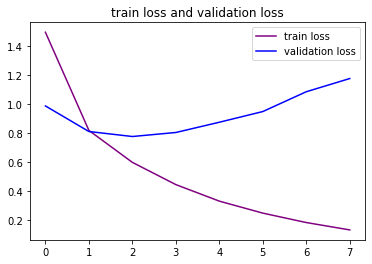

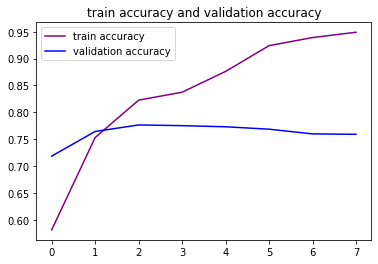

CPU times: user 13min 48s, sys: 50.3 s, total: 14min 38s
Wall time: 14min 40s


In [ ]:

############## train ##############

%%time

# training params

epochs = 8
runno = 128 #1800 #128 #639 #369 # float('inf')
clip = 6 # gradient clipping

# move model to GPU, if available
cla.to(device)

cla.train()
model, lowest_val_loss = home_huffpost + 'huffpost_headline.torm', float('inf')
# train for some number of epochs
loss_train, loss_val = [], []
accuracy_train, accuracy_val = [], []
for e in range(epochs):
    # initialize hidden state
    # h = cla.init_hidden(batch_size) # todo remove me
    # batch loop
    done, total = 0, data.get_size_train() + data.get_size_val() # batch_size * runno + data.get_size_val()
    num_correct_train, num_correct_val = 0.0, 0.0
    report_in_training(e + 1, epochs, done, total)
    c, loss_batch = 0, 0.0
    for X, y in data.get_iter_train():
        if X.shape[0] < data.batch_size: break
        c += 1
        ### if c > runno: break
        # create new variables for the hidden state, otherwise pytorch would backprop through the entire training history
        h = cla.init_hidden(X.shape[0]) # (h[0].detach(), h[1].detach()) # tuple([each.data for each in h])
        # zero accumulated gradients
        cla.zero_grad()
        # get the output from the model
        q, h = cla(X, h)
        yhat = q.argmax(dim = -1)
        correct_tensor = yhat.eq(y)
        num_correct_train += correct_tensor.sum()
        # calculate the loss and perform backprop
        debug(shape, (q, 'cla.forward output'))
        debug(shape, (y, 'label'))
        loss = criterion(q, y)
        loss_batch += loss.item()
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(cla.parameters(), clip)
        optimizer.step()
        done += batch_size
        report_in_training(e + 1, epochs, done, total)
    # loss stats
    loss_train.append(loss_batch / c)
    accuracy_train.append(num_correct_train / (data.get_size_train() - data.get_size_train() % data.batch_size)) # (batch_size * runno))
    ################ validation ################
    c, loss_batch = 0, 0.0
    cla.eval()
    # eval() and no_grad(): https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615/2
    with torch.no_grad(): 
        for X, y in data.get_iter_val():
            if X.shape[0] < data.batch_size: break
            c += 1
            # if c > runno: break
            # create new variables for the hidden state, otherwise pytorch would backprop through the entire training history
            val_h = cla.init_hidden(X.shape[0]) # tuple([each.data for each in val_h])
            q, val_h = cla(X, val_h)
            yhat = q.argmax(dim = -1)
            correct_tensor = yhat.eq(y)
            num_correct_val += correct_tensor.sum()
            loss = criterion(q, y)
            loss_batch += loss.item()
            done += batch_size
            report_in_training(e + 1, epochs, done, total)
        loss_val.append(loss_batch / c)
        accuracy_val.append(num_correct_val / (data.get_size_val() - data.get_size_val() % data.batch_size))
        cla.train()
        bet = False
        if lowest_val_loss > loss_val[-1]:
            torch.save(cla.state_dict(), model)
            lowest_val_loss = loss_val[-1]
            bet = True
        report_training(e + 1, epochs, loss_train[-1], loss_val[-1], accuracy_train[-1], accuracy_val[-1], bet)

pyplot.figure()
pyplot.title('train loss and validation loss')
pyplot.plot(range(epochs), loss_train, 'purple', label = 'train loss')
pyplot.plot(range(epochs), loss_val, 'blue', label = 'validation loss')
pyplot.legend()

pyplot.show()

pyplot.figure()
pyplot.title('train accuracy and validation accuracy')
pyplot.plot(range(epochs), accuracy_train, 'purple', label = 'train accuracy')
pyplot.plot(range(epochs), accuracy_val, 'blue', label = 'validation accuracy')
pyplot.legend()

pyplot.show()


In [ ]:

############## test ##############

%%time

def test():
    loss_test = [] # track loss
    num_correct = 0.0

    cla = Cla(data.vocab, output_size, hidden_dim, n_layers, bidirectional = True, drop_prob = drop_prob)
    cla.load_state_dict(torch.load(model))
    cla.to(device)

    cla.eval()
    # eval() and no_grad(): https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615/2
    with torch.no_grad(): 
        for X, y in data.get_iter_test():
            if X.shape[0] < data.batch_size: break
            # if c > runno: break
            # create new variables for the hidden state, otherwise pytorch would backprop through the entire training history
            h = cla.init_hidden(X.shape[0]) # tuple([each.data for each in h])
            # get predicted outputs
            q, h = cla(X, h)
            # compare predictions to true label
            yhat = q.argmax(dim = -1) # there is <oov> category with the index 0 # yhat = q.argsort(dim = -1)[ : , -2]
            correct_tensor = yhat.eq(y)
            num_correct += correct_tensor.sum()
            # calculate loss
            test_loss = criterion(q, y)
            loss_test.append(test_loss.item())

    ######### -- stats! -- #########
    # accuracy over all test data
    accuracy_test = num_correct / (data.get_size_test() - data.get_size_test() % data.batch_size)
    report_test(numpy.mean(loss_test), accuracy_test, accuracy_test > 0.8)

test()


test:	loss =  0.7777, accuracy =  77.80%
CPU times: user 6.24 s, sys: 88.5 ms, total: 6.32 s
Wall time: 6.32 s



# Transformer

**BERT** derivatives are used with the hope to improve the accuracy dramatically. [Huggingface Transformers](http://github.com/huggingface/transformers) is used as the fine-tuning base.


In [ ]:

! ls '/content/drive/My Drive/Colab Notebooks/kaggle/'
! head '/content/drive/My Drive/Colab Notebooks/kaggle/huffpost_headline.csv'


huffpost_headline.csv	 huffpost_headline_train.torm
huffpost-headline.ipynb  News_Category_Dataset_v2.json
huffpost_headline.torm
text,label
"By Daniel Maidman, Contributorartist and novelist : Demiurge : I have now and then heard artists likened to the demiurge - Plato's word for the divinity that made the cosmos. This never made a visceral impression on me until I saw how Assael paints. He summons an image the way the Genesis demiurge summons the universe. ~ Daniel Maidman, Contributorartist and novelist",0
"By  : Craig James Fired By FOX Sports Southwest Over Anti-Gay Comments: REPORT : “We just asked ourselves how Craig’s statements would play in our human resources department,” an unnamed Fox spokesman told ~ ",1
By Catherine Taibi : These Schools Are Rethinking How They Train Their Teachers :  ~ Catherine Taibi,2
"By Laura Schocker : 7 Health Lessons From The Irish : Tomorrow is St. Patrick's Day, a holiday that's earned itself an unhealthy rap by encouraging binge drinking and o

In [ ]:

batch_size = 8
seq_len = 78


In [ ]:

data_transformer_pandas = pandas.read_csv(home_huffpost + 'huffpost_headline.csv', dtype = {'text': 'object', 'label': 'category'})
data_transformer_pandas = data_transformer_pandas.sample(frac = 1.0)

print(f'data shape:\t{data_transformer_pandas.shape}')
data_transformer_pandas.head(9)


data shape:	(200853, 2)


text label
109097                                                                                                                                                                                                                                                                  By Chris D'Angelo : Supreme Court Halts Historic Hawaiian Election : Opponents of the election say the process is unconstitutional and racially exclusive. ~ Chris D'Angelo    12
141454                                                                                                                                                                                                                                                                   By Lee Moran : Barcelona Hire And Fire Soccer Player On Same Day Over Old Tweets : Sergi Guardiola's dream move to the Spanish giants lasted just seven hours. ~ Lee Moran     1
135641                                                                                                                                                                                                                                                                      By David Moye : Claw Machine Makes Florida Boy Its Next Victim : “He went in, but obviously he couldn't come back out the same way,” said one firefighter. ~ David Moye    19
129042                                                                                                                                                                                                                                                                       By  : 14 Reasons You Still Can't Sleep : You follow all the sleep rules to the letter, but you're still not getting the rest you need. Here are some reasons you're ~      3
180768  By Marten Weber, Contributor\nAuthor, 'Shayno,' 'Benedetto' and 'In the Mirror a Monster'' : Egg, Banana, and Coconut: Are Gays More Racist? : I like to think that there exists a global community of gay men and women who, in the face of discrimination and prejudice, all love and respect each other regardless of skin color. Yeah, right! ~ Marten Weber, Contributor\nAuthor, 'Shayno,' 'Benedetto' and 'In the Mirror a Monster''     8
31153                                                                                                                                                                                                                                                                                                                                     By Sara Wald : Does Your Business Deserve $25,000 Plus Mentoring? ENTER AND YOU COULD WIN! :  ~ Sara Wald    11
32603                                                                                                                                                                                                                                     By  : Male African-American Unemployment Is Over 50 Percent Among Dropouts : The online data shows the unemployment rates for 270 subgroups of Americans. More than half of male African-American high ~      6
8353                                                                                                                                                                                                                                                                      By Juliet Spies-Gans : Hilariously Angry Courtside Fan Screams 'JUST SUCK IT UP, LEBRON' : Unlike previous courtside fans, this woman showed no fear. ~ Juliet Spies-Gans     1
82696                                          By Jetsetter, Contributor\nJetsetter is the go-to brand for travelers with discerning tas... : Being A Jetsetter Curator : Jetsetter's editors are the gatekeepers of the site's hotels and homes and the people who send writers (and themselves) all over the globe to review them. (It's a hard job!) ~ Jetsetter, Contributor\nJetsetter is the go-to brand for travelers with discerning tas...    18


##Data-loader

In [ ]:

category_size = len(category)

ratio_train, ratio_val = 0.76, 0.13 # 0.8, 0.1 # 0.18, 0.1 # 0.002, 0.002
num_workers = 8

class DataSetHuffpost(torch.utils.data.dataset.Dataset):

    def __init__(self, path):
        self.data_pandas = pandas.read_csv(path, dtype = {'text': 'object', 'label': 'int'}) # pandas.read_csv(path, dtype = {'text': 'object', 'label': 'category'})

    @staticmethod
    def encode(X, y, tokenizer, device = device):
        encoding = tokenizer(X, return_tensors = 'pt', add_special_tokens = True, padding = True, truncation = True, max_length = seq_len, return_attention_mask = True)
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)
        y = torch.as_tensor(y, dtype = torch.long, device = device)
        y.requires_grad = False
        return input_ids, attention_mask, y

    def __getitem__(self, idx):
        return self.data_pandas.iloc[idx, 0], self.data_pandas.iloc[idx, 1]

    def __len__(self):
        return self.data_pandas.shape[0]

def splitin(amount, ratio_train, ratio_val):
    if ratio_train + ratio_val >= 1.0: ratio_train, ratio_val = 0.6, 0.2
    u, v = int(amount * ratio_train), int(amount * ratio_val)
    w = amount - u - v
    return u, v, w

dataset_train, dataset_val, dataset_test = torch.utils.data.random_split(DataSetHuffpost(home_huffpost + 'huffpost_headline.csv'),
                                                                         splitin(data_transformer_pandas.shape[0], ratio_train, ratio_val), 
                                                                         torch.Generator().manual_seed(random.randint(1, 8192)))


dataloader_train, dataloader_val, dataloader_test = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True, num_workers = num_workers, drop_last = True), \
    torch.utils.data.DataLoader(dataset_val, batch_size = batch_size, shuffle = True, num_workers = num_workers, drop_last = True), \
    torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True, num_workers = num_workers, drop_last = True)


In [ ]:

print(f'data shape:\t{data_transformer_pandas.shape}')
print(f'dataset expects:\t{data_transformer_pandas.shape[0] * ratio_train}; actual:\t{len(dataset_train)}')


data shape:	(200853, 2)
dataset expects:	152648.28; actual:	152648



## BERT/ALBERT

In [ ]:

pretrained_model = 'albert-base-v2' # 'albert-large-v2' # 'bert-base-uncased' # 'textattack/albert-base-v2-ag-news'

# from transformers import BertConfig, BertForSequenceClassification, BertTokenizer

# tokenizer = BertTokenizer.from_pretrained(pretrained_model, do_lower_case = True, remove_space = True)
# conf = BertConfig(num_labels = category_size)
# cla = BertForSequenceClassification.from_pretrained(pretrained_model, config = conf) # num_labels = category_size)

from transformers import AlbertConfig, AlbertForSequenceClassification, AlbertTokenizer

tokenizer = AlbertTokenizer.from_pretrained(pretrained_model, do_lower_case = True, remove_space = True)
conf = AlbertConfig(num_labels = category_size, hidden_size = 768, intermediate_size = 3072, classifier_dropout_prob = 0.3) # for albert-base-v2 ### conf = AlbertConfig(num_labels = category_size, hidden_size = 1024, intermediate_size = 4096) # for albert-large-v2
cla = AlbertForSequenceClassification.from_pretrained(pretrained_model, config = conf)

# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained(pretrained_model)
# cla = AutoModelForSequenceClassification.from_pretrained(pretrained_model)

cla.to(device)


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

AlbertForSequenceClassification(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768,

In [ ]:

model = home_huffpost + 'huffpost_headline.torm'
model_train = home_huffpost + 'huffpost_headline_train.torm'

# loss and optimization functions
lr = 6e-5 # 6e-4
eps = 1e-5

criterion = torch.nn.CrossEntropyLoss()

from transformers import AdamW
optimizer = AdamW(cla.parameters(), lr = lr, eps = eps)


epoch	1/12:	train loss =  1.8714, validation loss =  1.2953; train accuracy =  52.67%, validation accuracy =  67.54% 🥇
epoch	2/12:	train loss =  1.1024, validation loss =  1.0450; train accuracy =  72.39%, validation accuracy =  73.73% 🥇
epoch	3/12:	train loss =  0.8623, validation loss =  1.0198; train accuracy =  78.34%, validation accuracy =  74.66% 🥇
epoch	4/12:	train loss =  0.7168, validation loss =  1.0164; train accuracy =  82.39%, validation accuracy =  75.81% 🥇
epoch	5/12:	train loss =  0.6202, validation loss =  1.0926; train accuracy =  85.30%, validation accuracy =  76.33%
epoch	6/12:	train loss =  0.5533, validation loss =  1.1918; train accuracy =  87.44%, validation accuracy =  76.64%
epoch	7/12:	train loss =  0.5009, validation loss =  1.2802; train accuracy =  89.06%, validation accuracy =  76.33%
epoch	8/12:	train loss =  0.4613, validation loss =  1.3743; train accuracy =  90.39%, validation accuracy =  76.10%
epoch	9/12:	train loss =  0.4278, validation loss =  1.4

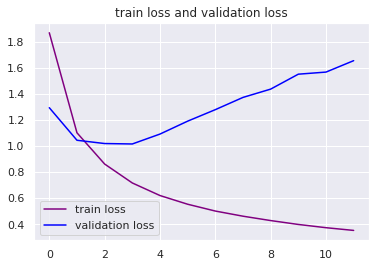

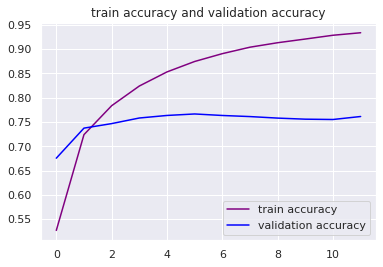

CPU times: user 4h 51min 52s, sys: 1h 36min 52s, total: 6h 28min 44s
Wall time: 6h 27min 39s


In [ ]:

############## train ##############

%%time

lowest_val_loss = INF

# training params

epochs = 12
runno = 32


# def free_torch(gpu_only = True):
#         total_size = 0
#         for obj in gc.get_objects():
#             try:
#                 if torch.is_tensor(obj):
#                     if not gpu_only or obj.is_cuda:
#                         del obj
#                         #gc.collect()
#                 elif hasattr(obj, "data") and torch.is_tensor(obj.data):
#                     if not gpu_only or obj.is_cuda:
#                         del obj
#                         #gc.collect()
#             except Exception as e:
#                 print(f'failed to free pytorch:\t{e}')
#             finally:
#                 torch.cuda.empty_cache()

def free_torch(objs):
    for obj in objs:
        try:
            del obj
        except Exception as e:
            print(f'failed to free pytorch:\t{e}')
        finally:
            torch.cuda.empty_cache()
            gc.collect()

# train for some number of epochs
loss_train, loss_val = [], []
accuracy_train, accuracy_val = [], []
input_ids = attention_mask = X = y = q = yhat = loss = loss_batch = correct_tensor = num_correct_val = None
for e in range(epochs):
    cla.train()
    ### if torch.cuda.is_available(): free_torch([input_ids, attention_mask, X, y, q, yhat, loss, loss_batch, correct_tensor, num_correct_val])
    done, total = 0, len(dataset_train) + len(dataset_val) ### batch_size * runno + len(dataset_val)
    num_correct_train, num_correct_val = 0.0, 0.0
    report_in_training(e + 1, epochs, done, total)
    c, loss_batch = 0, 0.0
    for X, y in dataloader_train:
        c += 1
        # if c % 9 == 0: print(f'GPU mem allocated in train: {torch.cuda.memory_allocated(device)}')
        ### if c > runno: break
        input_ids, attention_mask, y = DataSetHuffpost.encode(X, y, tokenizer)
        cla.zero_grad()
        ### # another way to calculate loss in the manual:
        q = cla(input_ids, attention_mask = attention_mask, labels = y) # 2-length tuple of: [0] loss; [1]: batch_size x classes.
        yhat = q[1].argmax(dim = -1)
        correct_tensor = yhat.eq(y)
        num_correct_train += correct_tensor.sum()
        loss = q[0]
        # q = cla(input_ids, attention_mask = attention_mask) # 1-length tuple of batch_size x classes.
        # yhat = q[0].argmax(dim = -1)
        # correct_tensor = yhat.eq(y)
        # num_correct_train += correct_tensor.sum()
        # loss = criterion(q[0], y) # in manual: F.cross_entropy(y, outputs[0])
        loss_batch += loss
        loss.backward()
        # clip to prevent 'exploding gradients'
        torch.nn.utils.clip_grad_norm_(cla.parameters(), 1.0)
        optimizer.step()
        done += batch_size
        report_in_training(e + 1, epochs, done, total)
    # loss statistics
    loss_train.append((loss_batch / len(dataloader_train)).item())
    accuracy_train.append((num_correct_train / len(dataset_train)).item()) ### (batch_size * runno))
    ################ validation ################
    c, loss_batch = 0, 0.0
    cla.eval()
    # eval() and no_grad(): https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615/2
    with torch.no_grad():
        for X, y in dataloader_val:
            # print(f'GPU mem allocated in validation: {torch.cuda.memory_allocated(device)}')
            c += 1
            ### if c > runno: break
            input_ids, attention_mask, y = DataSetHuffpost.encode(X, y, tokenizer)
            q = cla(input_ids, attention_mask = attention_mask, labels = y) # 2-length tuple of: [0] loss; [1]: batch_size x classes.
            yhat = q[1].argmax(dim = -1)
            correct_tensor = yhat.eq(y)
            num_correct_val += correct_tensor.sum()
            loss = q[0]
            # q = cla(input_ids, attention_mask = attention_mask)
            # yhat = q[0].argmax(dim = -1)
            # correct_tensor = yhat.eq(y)
            # num_correct_val += correct_tensor.sum()
            # loss = criterion(q[0], y) # mistake in manual: F.cross_entropy(y, outputs[0])
            loss_batch += loss
            done += batch_size
            report_in_training(e + 1, epochs, done, total)
        loss_val.append((loss_batch / len(dataloader_val)).item())
        accuracy_val.append((num_correct_val / len(dataset_val)).item()) ### (batch_size * runno))
        cla.train()
        torch.save(cla.state_dict(), model_train)
        bet = False
        if lowest_val_loss > loss_val[-1]:
            torch.save(cla.state_dict(), model)
            lowest_val_loss = loss_val[-1]
            bet = True
        report_training(e + 1, epochs, loss_train[-1], loss_val[-1], accuracy_train[-1], accuracy_val[-1], bet)

pyplot.figure()
pyplot.title('train loss and validation loss')
pyplot.plot(range(epochs), loss_train, 'purple', label = 'train loss')
pyplot.plot(range(epochs), loss_val, 'blue', label = 'validation loss')
pyplot.legend()

pyplot.show()

pyplot.figure()
pyplot.title('train accuracy and validation accuracy')
pyplot.plot(range(epochs), accuracy_train, 'purple', label = 'train accuracy')
pyplot.plot(range(epochs), accuracy_val, 'blue', label = 'validation accuracy')
pyplot.legend()

pyplot.show()


In [ ]:

############## test ##############

#%%time

def test(model):
    loss_test = num_correct = 0.0
    cla = AlbertForSequenceClassification.from_pretrained(pretrained_model, config = conf) # AutoModelForSequenceClassification.from_pretrained(pretrained_model) # AlbertForSequenceClassification.from_pretrained(pretrained_model, config = conf) #BertForSequenceClassification.from_pretrained(pretrained_model, num_labels = category_size)
    cla.load_state_dict(torch.load(model))
    cla.to(device)
    cla.eval()
    with torch.no_grad():
        for X, y in dataloader_test:
            # eval() and no_grad(): https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615/2
            input_ids, attention_mask, y = DataSetHuffpost.encode(X, y, tokenizer)
            q = cla(input_ids, attention_mask = attention_mask, labels = y) # 2-length tuple of: [0] loss; [1]: batch_size x classes.
            yhat = q[1].argmax(dim = -1)
            correct_tensor = yhat.eq(y)
            num_correct += correct_tensor.sum()
            loss = q[0]
            # q = cla(input_ids, attention_mask = attention_mask)
            # yhat = q[0].argmax(dim = -1)
            # correct_tensor = yhat.eq(y)
            # num_correct += correct_tensor.sum()
            # loss = criterion(q[0], y)
            loss_test += loss.item()
    ######### -- statistics! -- #########
    loss_test /= len(dataloader_test)
    accuracy_test = (num_correct / len(dataset_test)).item()
    report_test(loss_test, accuracy_test, accuracy_test > 0.8)

test(model)
test(model_train)


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

test:	loss =  1.0101, accuracy =  75.78%


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

test:	loss =  1.6317, accuracy =  76.32%



##Playgound


In [ ]:

pretrained_model = 'albert-xxlarge-v2'

from transformers import AlbertConfig, AlbertForSequenceClassification, AlbertTokenizer

tokenizer = AlbertTokenizer.from_pretrained(pretrained_model, do_lower_case = True, remove_space = True)
conf = AlbertConfig(num_labels = category_size, hidden_size = 4096, intermediate_size = 16384, classifier_dropout_prob = 0.3)
cla = AlbertForSequenceClassification.from_pretrained(pretrained_model, config = conf)
			

Some weights of the model checkpoint at albert-xxlarge-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-xxlarge-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
Y

In [ ]:

model = home_huffpost + 'huffpost_headline_playground.torm'
model_train = home_huffpost + 'huffpost_headline_playground_train.torm'

cla.to(device)

# loss and optimization functions
lr = 6e-5 # 6e-4
eps = 1e-5

criterion = torch.nn.CrossEntropyLoss()

from transformers import AdamW
optimizer = AdamW(cla.parameters(), lr = lr, eps = eps)


In [ ]:

############## train ##############

%%time

lowest_val_loss = INF

# training params

epochs = 12
runno = 32

def free_torch(objs):
    for obj in objs:
        try:
            del obj
        except Exception as e:
            print(f'failed to free pytorch:\t{e}')
        finally:
            torch.cuda.empty_cache()
            gc.collect()

# train for some number of epochs
loss_train, loss_val = [], []
accuracy_train, accuracy_val = [], []
input_ids = attention_mask = X = y = q = yhat = loss = loss_batch = correct_tensor = num_correct_val = None
for e in range(epochs):
    cla.train()
    ### if torch.cuda.is_available(): free_torch([input_ids, attention_mask, X, y, q, yhat, loss, loss_batch, correct_tensor, num_correct_val])
    done, total = 0, len(dataset_train) + len(dataset_val) ### batch_size * runno + len(dataset_val)
    num_correct_train, num_correct_val = 0.0, 0.0
    report_in_training(e + 1, epochs, done, total)
    c, loss_batch = 0, 0.0
    for X, y in dataloader_train:
        c += 1
        # if c % 9 == 0: print(f'GPU mem allocated in train: {torch.cuda.memory_allocated(device)}')
        ### if c > runno: break
        input_ids, attention_mask, y = DataSetHuffpost.encode(X, y, tokenizer)
        cla.zero_grad()
        ### # another way to calculate loss in the manual:
        q = cla(input_ids, attention_mask = attention_mask, labels = y) # 2-length tuple of: [0] loss; [1]: batch_size x classes.
        yhat = q[1].argmax(dim = -1)
        correct_tensor = yhat.eq(y)
        num_correct_train += correct_tensor.sum()
        loss = q[0]
        # q = cla(input_ids, attention_mask = attention_mask) # 1-length tuple of batch_size x classes.
        # yhat = q[0].argmax(dim = -1)
        # correct_tensor = yhat.eq(y)
        # num_correct_train += correct_tensor.sum()
        # loss = criterion(q[0], y) # in manual: F.cross_entropy(y, outputs[0])
        loss_batch += loss
        loss.backward()
        # clip to prevent 'exploding gradients'
        torch.nn.utils.clip_grad_norm_(cla.parameters(), 1.0)
        optimizer.step()
        done += batch_size
        report_in_training(e + 1, epochs, done, total)
    # loss statistics
    loss_train.append((loss_batch / len(dataloader_train)).item())
    accuracy_train.append((num_correct_train / len(dataset_train)).item()) ### (batch_size * runno))
    ################ validation ################
    c, loss_batch = 0, 0.0
    cla.eval()
    # eval() and no_grad(): https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615/2
    with torch.no_grad():
        for X, y in dataloader_val:
            # print(f'GPU mem allocated in validation: {torch.cuda.memory_allocated(device)}')
            c += 1
            ### if c > runno: break
            input_ids, attention_mask, y = DataSetHuffpost.encode(X, y, tokenizer)
            q = cla(input_ids, attention_mask = attention_mask, labels = y) # 2-length tuple of: [0] loss; [1]: batch_size x classes.
            yhat = q[1].argmax(dim = -1)
            correct_tensor = yhat.eq(y)
            num_correct_val += correct_tensor.sum()
            loss = q[0]
            # q = cla(input_ids, attention_mask = attention_mask)
            # yhat = q[0].argmax(dim = -1)
            # correct_tensor = yhat.eq(y)
            # num_correct_val += correct_tensor.sum()
            # loss = criterion(q[0], y) # mistake in manual: F.cross_entropy(y, outputs[0])
            loss_batch += loss
            done += batch_size
            report_in_training(e + 1, epochs, done, total)
        loss_val.append((loss_batch / len(dataloader_val)).item())
        accuracy_val.append((num_correct_val / len(dataset_val)).item()) ### (batch_size * runno))
        cla.train()
        torch.save(cla.state_dict(), model_train)
        bet = False
        if lowest_val_loss > loss_val[-1]:
            torch.save(cla.state_dict(), model)
            lowest_val_loss = loss_val[-1]
            bet = True
        report_training(e + 1, epochs, loss_train[-1], loss_val[-1], accuracy_train[-1], accuracy_val[-1], bet)

pyplot.figure()
pyplot.title('train loss and validation loss')
pyplot.plot(range(epochs), loss_train, 'purple', label = 'train loss')
pyplot.plot(range(epochs), loss_val, 'blue', label = 'validation loss')
pyplot.legend()

pyplot.show()

pyplot.figure()
pyplot.title('train accuracy and validation accuracy')
pyplot.plot(range(epochs), accuracy_train, 'purple', label = 'train accuracy')
pyplot.plot(range(epochs), accuracy_val, 'blue', label = 'validation accuracy')
pyplot.legend()

pyplot.show()


epoch	1/12:	train loss =  1.9187, validation loss =  1.7066; train accuracy =  51.57%, validation accuracy =  59.74% 🥇
epoch	2/12:	train loss =  1.5042, validation loss =  1.4063; train accuracy =  63.42%, validation accuracy =  66.17% 🥇
epoch	3/12:	 47.10% 👈

In [ ]:

############## test ##############

#%%time

def test(model):
    loss_test = num_correct = 0.0
    cla = AlbertForSequenceClassification.from_pretrained(pretrained_model, config = conf) # AutoModelForSequenceClassification.from_pretrained(pretrained_model) # AlbertForSequenceClassification.from_pretrained(pretrained_model, config = conf) #BertForSequenceClassification.from_pretrained(pretrained_model, num_labels = category_size)
    cla.load_state_dict(torch.load(model))
    cla.to(device)
    cla.eval()
    with torch.no_grad():
        for X, y in dataloader_test:
            # eval() and no_grad(): https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615/2
            input_ids, attention_mask, y = DataSetHuffpost.encode(X, y, tokenizer)
            q = cla(input_ids, attention_mask = attention_mask, labels = y) # 2-length tuple of: [0] loss; [1]: batch_size x classes.
            yhat = q[1].argmax(dim = -1)
            correct_tensor = yhat.eq(y)
            num_correct += correct_tensor.sum()
            loss = q[0]
            # q = cla(input_ids, attention_mask = attention_mask)
            # yhat = q[0].argmax(dim = -1)
            # correct_tensor = yhat.eq(y)
            # num_correct += correct_tensor.sum()
            # loss = criterion(q[0], y)
            loss_test += loss.item()
    ######### -- statistics! -- #########
    loss_test /= len(dataloader_test)
    accuracy_test = (num_correct / len(dataset_test)).item()
    report_test(loss_test, accuracy_test, accuracy_test > 0.8)

test(model)
test(model_train)
